In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
data = pd.read_csv('train.csv')

In [84]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [86]:
#Data Preprocessing

In [87]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [88]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [89]:
data.Gender = data.Gender.fillna('Male')

In [90]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [91]:
data.Married = data.Married.fillna('Yes')

In [92]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [93]:
data.Dependents = data.Dependents.fillna('0')

In [94]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [95]:
data.Self_Employed = data.Self_Employed.fillna('No')

In [96]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [97]:
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(360.0)

In [98]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [99]:
data.Credit_History = data.Credit_History.fillna(1.0)

In [100]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [101]:
data['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [102]:
data.LoanAmount = data.LoanAmount.fillna(120.0)

In [103]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [104]:
#Split the data into input and output
X = data.iloc[:,1:12].values
y = data.iloc[:,12]

In [105]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [106]:
#train and test split

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.15,random_state=0)

In [109]:
X_train

array([['Male', 'Yes', '3+', ..., 300.0, 0.0, 'Semiurban'],
       ['Female', 'No', '0', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'No', '0', ..., 180.0, 0.0, 'Urban'],
       ...,
       ['Male', 'Yes', '3+', ..., 360.0, 1.0, 'Semiurban'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'Yes', '0', ..., 360.0, 1.0, 'Semiurban']], dtype=object)

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
labelencoder = LabelEncoder()

In [112]:
for i in range(0,5):
  X_train[:,i] = labelencoder.fit_transform(X_train[:,i])
X_train[:,10] = labelencoder.fit_transform(X_train[:,10])

In [113]:
labelencoder_y = LabelEncoder()

In [114]:
y_train = labelencoder_y.fit_transform(y_train)

In [115]:
labelencoder_xt = LabelEncoder()

In [116]:
for i in range(0,5):
  X_test[:,i] = labelencoder.fit_transform(X_test[:,i])
X_test[:,10] = labelencoder.fit_transform(X_test[:,10])

In [117]:
y_test = labelencoder_y.fit_transform(y_test)

In [118]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0])

In [119]:
X_train

array([[1, 1, 3, ..., 300.0, 0.0, 1],
       [0, 0, 0, ..., 360.0, 1.0, 0],
       [1, 0, 0, ..., 180.0, 0.0, 2],
       ...,
       [1, 1, 3, ..., 360.0, 1.0, 1],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       [0, 1, 0, ..., 360.0, 1.0, 1]], dtype=object)

In [120]:
#Scaling
from sklearn.preprocessing import StandardScaler

In [121]:
sc = StandardScaler()

In [122]:
X_train = sc.fit_transform(X_train)

In [123]:
X_train

array([[ 0.46919134,  0.72038215,  2.17558327, ..., -0.65353768,
        -2.38316747, -0.05797812],
       [-2.13132663, -1.38815211, -0.75835689, ...,  0.2808562 ,
         0.41960962, -1.31658644],
       [ 0.46919134, -1.38815211, -0.75835689, ..., -2.52232546,
        -2.38316747,  1.20063021],
       ...,
       [ 0.46919134,  0.72038215,  2.17558327, ...,  0.2808562 ,
         0.41960962, -0.05797812],
       [ 0.46919134,  0.72038215, -0.75835689, ...,  0.2808562 ,
         0.41960962,  1.20063021],
       [-2.13132663,  0.72038215, -0.75835689, ...,  0.2808562 ,
         0.41960962, -0.05797812]])

In [124]:
X_test = sc.fit_transform(X_test)

In [125]:
# PCA

In [126]:
from sklearn.decomposition import PCA

In [127]:
pca = PCA(n_components=3)

In [128]:
X_train = pca.fit_transform(X_train)

In [129]:
X_test = pca.fit_transform(X_test)

In [130]:
X_train

array([[ 1.64679643, -1.48815272, -0.32471348],
       [-2.30244414,  1.48529443, -0.15366426],
       [-0.93950317, -1.27000434, -1.0730623 ],
       ...,
       [ 1.64826391, -0.77301116,  0.63179218],
       [-0.23372828, -0.81404276, -0.42168748],
       [-0.55170886,  1.00791424,  0.86255378]])

In [131]:
#Classification
# logistic regression
# nearest neighbor
# SVM

In [132]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [133]:
lrclf = LogisticRegression(max_iter=100,random_state=0)

In [134]:
lrclf.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [135]:
lrclf.predict(X_test)

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [136]:
y_pred = lrclf.predict(X_test)

In [137]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0])

In [138]:
from sklearn import metrics

In [139]:
metrics.accuracy_score(y_test,y_pred)

0.7096774193548387

In [140]:
cm = metrics.confusion_matrix(y_test,y_pred)

In [141]:
cm

array([[ 4, 21],
       [ 6, 62]], dtype=int64)

In [142]:
X_test[:,0]

array([-0.67903722, -1.74239309,  1.61794193,  0.20790812,  0.76975161,
       -0.70313505,  2.57263966,  2.25497739, -1.32053089, -0.10368906,
       -2.090584  ,  0.03563243, -0.21385318,  1.82223367,  1.68267063,
        0.40801644, -0.49141716, -1.01097314, -2.35850784, -0.68219774,
       -1.94182173,  0.04486777,  0.97331245,  1.87600025, -0.4849454 ,
        1.63330488, -0.40456632,  0.70950819,  0.67651309, -2.50166894,
        1.54403642, -1.12493625,  0.05621985,  1.00794596,  0.22565732,
       -1.93405461,  0.17804654, -1.08447777,  0.57616476,  0.81401258,
       -2.00150328,  0.55807411,  0.86365462,  0.80549822, -0.88438729,
        0.25245063,  0.59515461, -1.67890234,  0.69289305, -0.62396468,
        1.01402931,  0.3815525 , -0.35357924, -0.736781  , -0.40345355,
        1.21646694, -0.04800076, -0.46219241,  1.4064427 , -0.65659181,
       -2.91480098, -0.32741972, -0.26286048, -2.80826766,  1.46856508,
        1.96486729, -0.26432391, -0.8267025 ,  0.37023184, -1.17

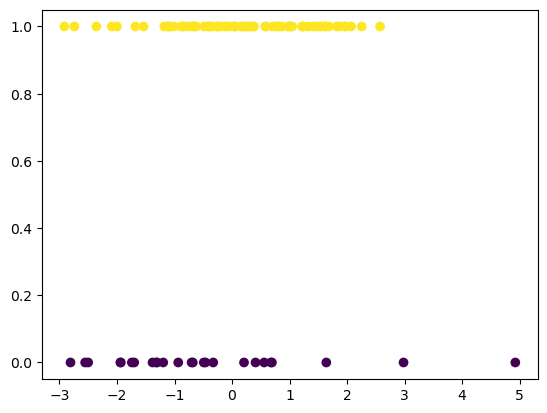

In [143]:
# observed data plot
plt.scatter(X_test[:,0],y_test,c=y_test)

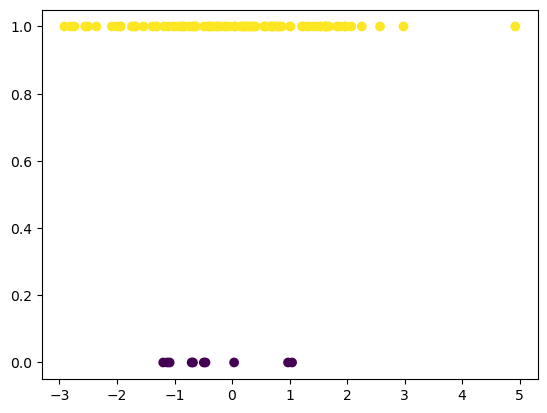

In [144]:
# predicted data plot
plt.scatter(X_test[:,0],y_pred,c=y_pred)

In [145]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [146]:
knnclf = KNeighborsClassifier(n_neighbors=5)

In [147]:
knnclf.fit(X_train,y_train)

KNeighborsClassifier()

In [148]:
knnclf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1])

In [149]:
y_pred = knnclf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


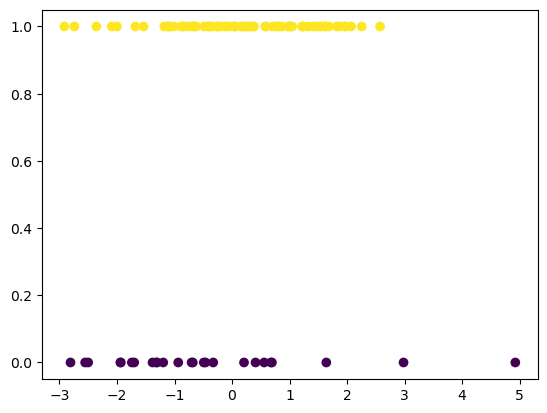

In [150]:
plt.scatter(X_test[:,0],y_test, c=y_test)

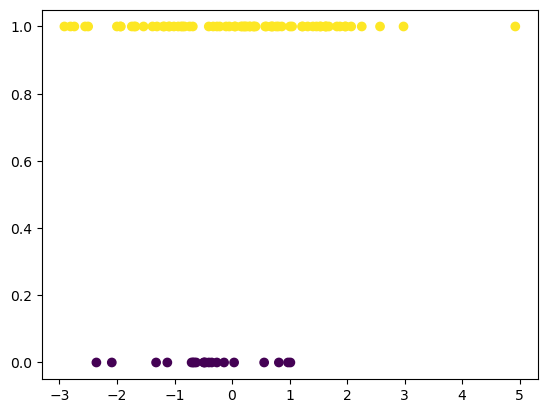

In [151]:
plt.scatter(X_test[:,0],y_pred,c=y_pred)

In [152]:
metrics.accuracy_score(y_test,y_pred)

0.6236559139784946

In [153]:
cm = metrics.confusion_matrix(y_test,y_pred)

In [154]:
cm

array([[ 5, 20],
       [15, 53]], dtype=int64)

In [155]:
# Support Vector Machine
from sklearn.svm import SVC

In [156]:
svcrbf = SVC(random_state=0)
svclin = SVC(random_state=0)

In [157]:
svcrbf.fit(X_train,y_train)
svclin.fit(X_train,y_train)

SVC(random_state=0)

In [158]:
y_predr = svcrbf.predict(X_test)
y_predl = svclin.predict(X_test)

In [159]:
#rbf svm
metrics.accuracy_score(y_test,y_predr)

0.6989247311827957

In [160]:
#lin svm
metrics.accuracy_score(y_test,y_predl)

0.6989247311827957

In [161]:
import pickle

# Save the model to a file
with open('loan_prediction_model.pkl', 'wb') as file:
    pickle.dump(lrclf, file)
